CNN with MNIST data(Pytorch)
===========

Import pakages
-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
from torchsummary import summary as summary_
from torch import optim

c:\Users\user\.conda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Download datas
-----

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [3]:
print(mnist.data[0])
print(type(mnist.data[0]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [4]:
print(mnist.target[0])
print(type(mnist.target[0]))

5
<class 'str'>


Preprocess datas
----

In [5]:
mnist.target = mnist.target.astype(np.int8) # Target이 지금 'str'형으로 되어 있는데 이를 'int'형으로 바꿈

In [6]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

If we use a CNN model with Pytorch, we need to change the shape of dataset as
$\left( N, C, H, W \right)$.

$N$ means the number of data.

$C$ means the number of channel.

$H$, $W$ mean the size of data.

In [7]:
X = np.reshape(X,(-1,1,28,28))
print(X.shape)

(70000, 1, 28, 28)


이 이미지 데이터의 레이블은 9이다


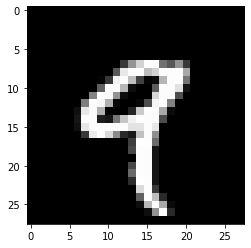

In [8]:
plt.imshow(X[4].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[4]))

In [9]:
X_train = X[0:60000]
X_test = X[60000:]
y_train = y[0:60000]
y_test = y[60000:]
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

Construct model
-----



Pythorch provides a convolutional neural network layer through the command "torch.nn.Conv2d".

Also, we need a (max/average) pooling layer during CNN model.

Pythorch provides a pooling layer through the command "torch.nn.MaxPool2d", "torch.nn.AvgPool2d".

torch.nn.Conv2d
------
torch.nn.Conv2d has 3 essential inputs (in_channels / out_channels / kernel_size)

in_channels : the number of channels of input data

out_channels : the number of channels of output data

kernel_size : the size of kernel 

torch.nn.Conv2d has other inessential inputs(stride / padding / padding_mode / dilation / bias etc.)

stride : the stride of the convolution - default = 1

padding : the length of padding - default = 0

padding_mode : how method of padding('zeros', 'reflect', 'replicate', 'circular') - default = 'zeros'

dilation : spacing between kernel elements - default = 1

bias : whether adding a learnable bias to the output - default = True

output size formular is

![ex_screenshot](./output_form.jpg)


In [10]:
model = nn.Sequential()
model.add_module('conv1',nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=0))
model.add_module('relu1',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(2,2))
model.add_module('conv2',nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0))
model.add_module('relu2',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(3,3))
model.add_module('flatten',nn.Flatten())
model.add_module('fc1', nn.Linear(in_features=32*3*3, out_features=64))
model.add_module('relu4', nn.ReLU())
model.add_module('fc3', nn.Linear(in_features=64, out_features=10))

summary_(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
            Conv2d-4             [-1, 32, 9, 9]          12,832
              ReLU-5             [-1, 32, 9, 9]               0
         MaxPool2d-6             [-1, 32, 3, 3]               0
           Flatten-7                  [-1, 288]               0
            Linear-8                   [-1, 64]          18,496
              ReLU-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 32,138
Trainable params: 32,138
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.23
Params size (MB): 0.12
Estimated Tot

In [11]:
# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch+1))

In [13]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.2f}%)\n'.format(correct,
                                                   data_num, 100. * float(correct) / float(data_num)))
    return float(correct) / float(data_num)

In [ ]:
index = np.random.randint(10000)

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
data = data.view([-1,1,28,28])
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted.item()))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

Before training
-----
We can test the model before training.

In [14]:
test()


테스트 데이터에서 예측 정확도: 762/10000 (7.62%)



0.0762

Training
-----

In [15]:
acc = []
MAX_ITERATION=5
for epoch in range(MAX_ITERATION):
    train(epoch)
    acc.append(test())


epoch1：완료


테스트 데이터에서 예측 정확도: 9749/10000 (97.49%)

epoch2：완료


테스트 데이터에서 예측 정확도: 9782/10000 (97.82%)

epoch3：완료


테스트 데이터에서 예측 정확도: 9848/10000 (98.48%)

epoch4：완료


테스트 데이터에서 예측 정확도: 9882/10000 (98.82%)

epoch5：완료


테스트 데이터에서 예측 정확도: 9886/10000 (98.86%)



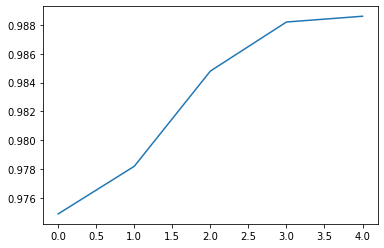

In [16]:
plt.plot(acc)

Check the model with data in testset
------

예측 결과 : 1
이 이미지 데이터의 정답 레이블은 1입니다


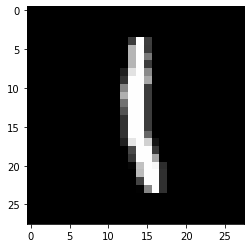

In [17]:
index = np.random.randint(10000)

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
data = data.view([-1,1,28,28])
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted.item()))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))


Check the model with custom image data
-----


In [18]:
from PIL import Image
model.eval()

img = Image.open('4-1.jpg').convert("L")
img = np.array(img)
img = img / 255.0
img = 1 - img
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

예측 결과 : 2


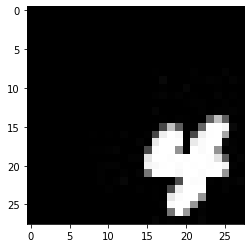

In [19]:
img = np.reshape(img,(-1,1,28,28))


data = torch.tensor(img, dtype=torch.float32)
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
print("예측 결과 : {}".format(predicted.item()))

plt.imshow(img.reshape(28, 28), cmap='gray')